# Exploratory Data Analysis

In [17]:
from dotenv import load_dotenv
import os

# Cargar automáticamente las variables del archivo .env
load_dotenv()

True

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
DATA_RAW = os.getenv('DATA_RAW')
DATA_PREPROCESSED = os.getenv('DATA_PROCESSED')

## Información de producción

In [25]:
df_historial = pd.read_csv(os.path.join('..', DATA_RAW, "helados-ajuste-completo.csv"), sep = ";")

In [26]:
#Pasamos a formate date
df_historial['Ajuste Fecha'] = pd.to_datetime(df_historial['Ajuste Fecha'])

,Ajuste Fecha,Dia Semana,Sabor 1,Sabor 2,Sabor 3,Sabor 4,Sabor 5,Sabor 6,Sabor 7,Sabor 8,...,Sabor 72,Sabor 73,Sabor 74,Sabor 75,Sabor 76,Sabor 77,Sabor 78,Sabor 79,Unnamed: 81,Total Cantidad
0,8/7/19 0:00,Lunes,"20,61","38,54","22,36","20,7","15,74","17,69","47,42","25,69",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9/7/19 0:00,Martes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10/7/19 0:00,Miércoles,NaN,"-5,56",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/7/19 0:00,Jueves,"-4,84",NaN,NaN,NaN,NaN,NaN,"-5,41",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13/7/19 0:00,Viernes,"21,5","19,28","33,16","24,78","15,33",NaN,"37,62","12,44",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2028,30/1/25 0:00,Sábado,"-18,01","-11,69","-18,88",NaN,NaN,"-23,35","-33,94","-14,59",...,"-1,01","-23,91","-42,07","-5,63",-2.0,-3.0,"-19,76","-4,94",NaN,"-987,58"
2029,31/1/25 0:00,Domingo,"-15,91","-11,45","-12,33",NaN,NaN,"-17,32","-4,84","-9,73",...,-1,"-30,71",NaN,"-22,73",-2.0,-6.0,"-12,62","-14,72",NaN,"-792,91"
2030,1/2/25 0:00,Lunes,"-23,79","-6,04","-32,65",NaN,NaN,"-17,99",NaN,NaN,...,"-5,08","-47,22","-48,02","-24,88",-2.0,-4.0,"-13,16","-28,05",NaN,"-1.295,27"
2031,2/2/25 0:00,Martes,"-22,86","-6,03","-31,98",NaN,NaN,"-22,8","-19,44","-4,87",...,"-7,12","-34,44","-35,96","-25,76",-8.0,-4.0,"-13,34","-5,89",0.0,"-1.177,19"


In [35]:
#Pasamos a formate date
df_historial['Ajuste Fecha'] = pd.to_datetime(df_historial['Ajuste Fecha'])

C:\Users\IA-41\AppData\Local\Temp\ipykernel_12016\4186638908.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_historial['Ajuste Fecha'] = pd.to_datetime(df_historial['Ajuste Fecha'])


## Información climática

In [20]:
df_tiempo = pd.read_csv(os.path.join('..',DATA_RAW, "temp-history.csv"), sep=',')

In [27]:
#Pasamos a formato date
df_tiempo['dt_iso'] = pd.to_datetime(df_tiempo['dt_iso'].str.replace(' UTC','')).dt.date
df_tiempo['dt_iso'] = pd.to_datetime(df_tiempo['dt_iso'], format='%Y-%m-%d').dt.date
df_tiempo['dt_iso'] = pd.to_datetime(df_tiempo['dt_iso'])

menorFechaRegistrada = df_historial['Ajuste Fecha'].min()
mayorFechaRegistrada = df_historial['Ajuste Fecha'].max()

#Filtramos df_tiempo
df_tiempo = df_tiempo[(df_tiempo['dt_iso'] >= menorFechaRegistrada) & (df_tiempo['dt_iso'] <= mayorFechaRegistrada)]

#Eliminamos columnas donde solo hay valores vacíos
df_tiempo.dropna(axis=1, how='all', inplace=True)

#Eliminamos indices
df_tiempo.drop(['dt', 'weather_id'], axis='columns', inplace=True)

C:\Users\IA-41\AppData\Local\Temp\ipykernel_12016\3835220042.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tiempo.dropna(axis=1, how='all', inplace=True)
C:\Users\IA-41\AppData\Local\Temp\ipykernel_12016\3835220042.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tiempo.drop(['dt', 'weather_id'], axis='columns', inplace=True)


C:\Users\IA-41\AppData\Local\Temp\ipykernel_12016\4195735237.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


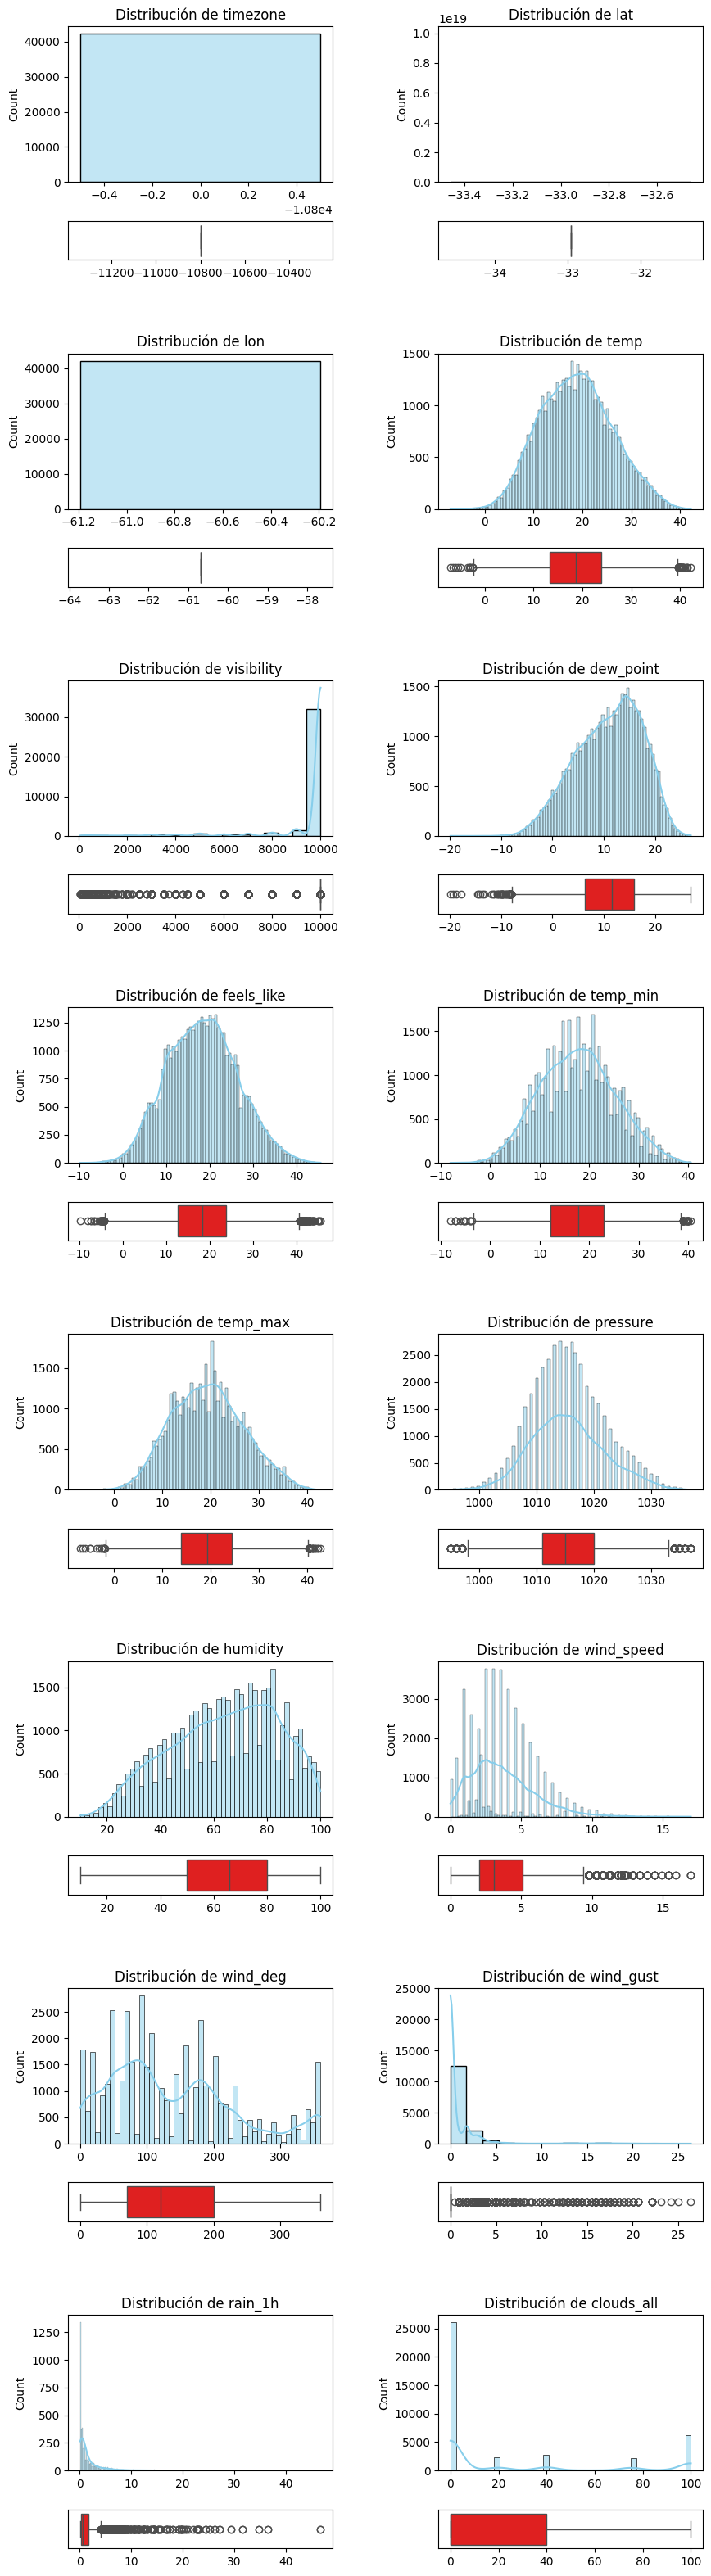

In [29]:
import matplotlib.gridspec as gridspec

variables = df_tiempo.select_dtypes(include='number').columns
n_vars = len(variables)

# Cantidad de columnas en la grilla (por ejemplo, 2 columnas)
n_cols = 2
n_rows = int(np.ceil(n_vars / n_cols))

fig = plt.figure(figsize=(10, 5 * n_rows))

# Grid general
outer_grid = gridspec.GridSpec(n_rows, n_cols, wspace=0.4, hspace=0.4)

for i, var in enumerate(variables):
    row = i // n_cols
    col = i % n_cols
    inner_grid = gridspec.GridSpecFromSubplotSpec(
        2, 1, height_ratios=[4, 1],
        subplot_spec=outer_grid[i], hspace=0.4
    )

    # Histograma + KDE
    ax_top = plt.Subplot(fig, inner_grid[0])
    sns.histplot(df_tiempo[var], kde=True, ax=ax_top, color='skyblue')
    ax_top.set_title(f'Distribución de {var}')
    ax_top.set_xlabel('')
    fig.add_subplot(ax_top)

    # Boxplot
    ax_bottom = plt.Subplot(fig, inner_grid[1])
    sns.boxplot(x=df_tiempo[var], ax=ax_bottom, color='red')
    ax_bottom.set_yticks([])
    ax_bottom.set_xlabel('')
    fig.add_subplot(ax_bottom)

plt.tight_layout()
plt.show()


Por lo que podemos observar en los gráficos, la muchas de las variables numéricas presentan una distribución aproximadamente simétrica y baja cantidad de valores atípicos. Sin embargo, hay unas pocas que sí requerirán ser tratadas con otros métodos de resumen.

Las variables que admiten el uso de la media para su resumen gracias a su simetría son las siguientes:
- timezone
- lat
- lon
- temp
- dew_point
- feels_like
- temp_min
- temp_max
- pressure

Las variables que no poseen simetría o están sesgadas y, por lo tanto, deberán ser resumidas con la mediana son las siguientes:
- visibillity
- humidityu
- wind_speed
- wind_deg
- wind_gust
- rain_1h
- rain_3h
- clouds_all

En el caso de las variables categóricas, serán resumidas con la moda

Encontramos también ciertas columnas que solo tienen un valor dentro de ellas. Al ser constantes no serán útiles para la predicción.

In [32]:
columnasConUnSoloValor = []
for columna in df_tiempo.columns:
    if len(df_tiempo[columna].unique()) == 1:
        columnasConUnSoloValor.append(columna)


print("Columnas con un solo valor:")
print(columnasConUnSoloValor)

#Eliminamos columnas donde solo hay un valor
df_tiempo.drop(columnasConUnSoloValor, axis='columns', inplace=True)

#variables categoricas
df_tiempo.select_dtypes(include='object').columns

df_tiempo_agrupado = df_tiempo.groupby('dt_iso').agg({
    #Variables simétricas
    'temp': 'mean',
    'dew_point': 'mean',
    'feels_like': 'mean',
    'temp_min': 'min',
    'temp_max': 'max',
    'pressure': 'mean',

    #Variables asimétricas
    'visibility':'median',
    'humidity':'median',
    'wind_speed':'median',
    'wind_deg':'median',
    'wind_gust':'median',
    'rain_1h':'median',
    #'rain_3h':'median',
    'clouds_all':'median',

    #Variables categóricas
    'weather_main': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,  # moda
    'weather_description': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,  # moda
    'weather_icon': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,  # moda
}).reset_index()

Columnas con un solo valor:
[]


C:\Users\IA-41\AppData\Local\Temp\ipykernel_12016\3568862739.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tiempo.drop(columnasConUnSoloValor, axis='columns', inplace=True)


Ahora ya tenemos el dataset del tiempo agrupado, listo para ser combinado con el dataset de historial de ventas para formar un conjunto de datos que contenga toda la información.

In [33]:
df_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42159 entries, 90724 to 132882
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dt_iso               42159 non-null  datetime64[ns]
 1   temp                 42159 non-null  float64       
 2   visibility           36958 non-null  float64       
 3   dew_point            42159 non-null  float64       
 4   feels_like           42159 non-null  float64       
 5   temp_min             42159 non-null  float64       
 6   temp_max             42159 non-null  float64       
 7   pressure             42159 non-null  int64         
 8   humidity             42159 non-null  int64         
 9   wind_speed           42159 non-null  float64       
 10  wind_deg             42159 non-null  int64         
 11  wind_gust            15523 non-null  float64       
 12  rain_1h              3980 non-null   float64       
 13  clouds_all           42159 non-

## Combinación de los dataset

In [36]:
df = pd.merge(df_historial, df_tiempo_agrupado, left_on='Ajuste Fecha', right_on='dt_iso', how='left')

## Análisis

In [37]:
import pandas as pd
import plotly.graph_objects as go

# Asegurarte que las fechas estén en formato datetime
df['Ajuste Fecha'] = pd.to_datetime(df['Ajuste Fecha'])

# Ordenar por fecha
df = df.sort_values('Ajuste Fecha')

# Crear figura
fig = go.Figure()

# Crear lista de trazas y botones para cada sabor
botones = []
for i in range(1, 11):  # Sabores 1 al 10
    col = f'Sabor {i}'
    
    # Limpiar y convertir a float
    sabor = df[col].astype(str).str.replace('-', '').str.replace(',', '.').astype(float)
    
    # Calcular media móvil
    sabor_rolling = sabor.rolling(window=15, min_periods=1).mean()
    
    # Agregar traza diaria (inicialmente invisible)
    fig.add_trace(go.Scatter(
        x=df['Ajuste Fecha'], y=sabor,
        name=f'{col} Diario',
        visible=(i == 1),  # Solo mostrar el primer sabor por defecto
        line=dict(color='lightblue')
    ))
    
    # Agregar traza suavizada
    fig.add_trace(go.Scatter(
        x=df['Ajuste Fecha'], y=sabor_rolling,
        name=f'{col} Media Móvil',
        visible=(i == 1),
        line=dict(color='blue')
    ))
    
    # Botón para activar solo las trazas del sabor i
    visibilidad = [False] * 20  # 2 trazas por sabor × 10 sabores
    visibilidad[2 * (i - 1)] = True       # línea original
    visibilidad[2 * (i - 1) + 1] = True   # línea suavizada
    
    botones.append(dict(label=f'Sabor {i}',
                        method='update',
                        args=[{'visible': visibilidad},
                              {'title': f'Ventas de Sabor {i}'}]))

# Layout con el menú
fig.update_layout(
    updatemenus=[{
        'buttons': botones,
        'direction': 'down',
        'showactive': True,
        'x': 1.15,
        'xanchor': 'left',
        'y': 1,
        'yanchor': 'top'
    }],
    title='Ventas de Sabor 1',
    xaxis_title='Fecha',
    yaxis_title='Kilos vendidos',
    legend_title='Tipo de serie',
    height=500,
    width=1200
)

fig.show()


C:\Users\IA-41\AppData\Local\Temp\ipykernel_12016\2333951587.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



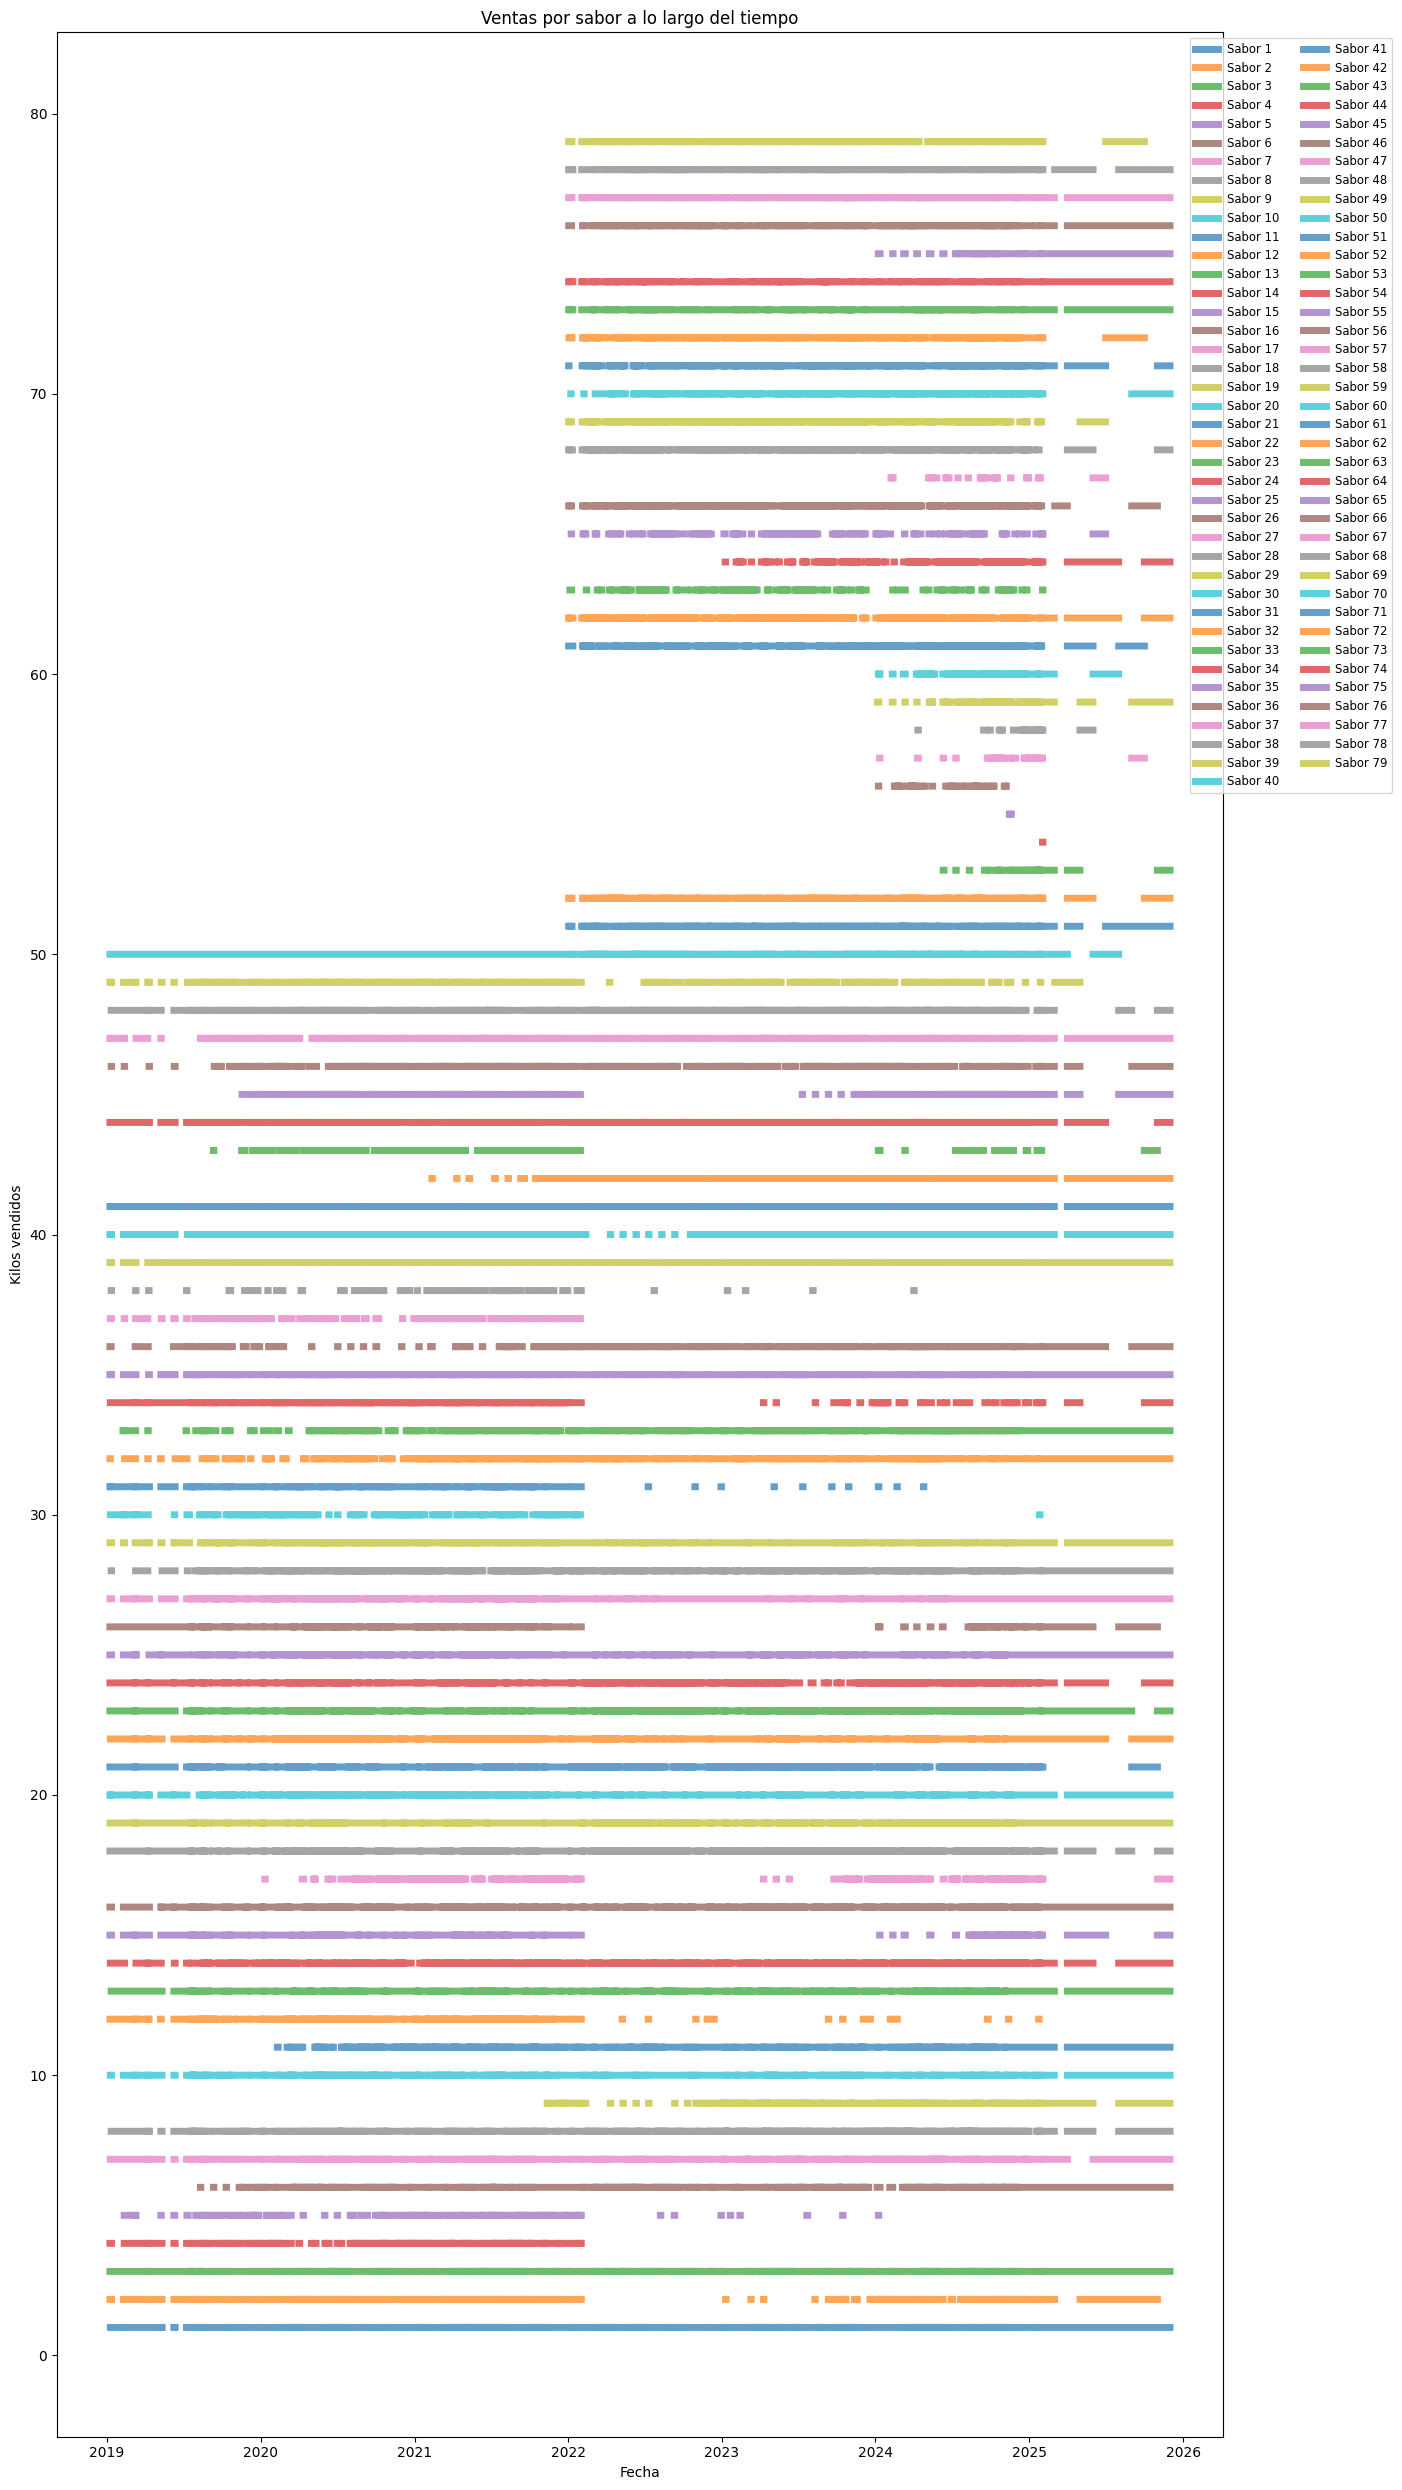

In [38]:
listaSabores = [f'Sabor {i}' for i in range(1, 80)]
listaSabores.append('Ajuste Fecha')
df_timeline = df[listaSabores]

def crear_constante(i, x):
    if pd.isna(x) or x == 0 or str(x).strip() == "":
        return None
    else:
        return i

for i in range(1,80):
    df_timeline[f'Sabor {i}'] = df_timeline[f'Sabor {i}'].apply(lambda x: crear_constante(i, x))

plt.figure(figsize=(14, 25))

# Graficar sabores del 1 al 80
for i in range(1, 81):  # NOTA: 81 porque el último no se incluye
    nombre_columna = f'Sabor {i}'
    if nombre_columna in df_timeline.columns:
        plt.plot(df_timeline['Ajuste Fecha'], df_timeline[nombre_columna], label=nombre_columna, alpha=0.7, linewidth=5)

plt.xlabel("Fecha")
plt.ylabel("Kilos vendidos")
plt.title("Ventas por sabor a lo largo del tiempo")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small', ncol=2)
plt.tight_layout()
plt.show()


A simple vista podemos encontrar un patrón:
- Hay sabores cuya venta nunca se detuvo.
- Hay sabores que se venden desde el inicio del registro de los datos pero tuvieron meses o años sin vender.
- Hay sabores que comenzaron a venderse a partir del año 2022.
- Hay sabores que se vendieron hasta el año 2022.
- Hay sabores cuyos registros son muy escasos (alrededor de dos años de venta).

Para cada uno de estos casos se me ocurrió realizar entrenamientos distintos.

In [39]:
import re 
def es_alfabetico(valor):
    '''
    Esta función comprueba que no hayan cadenas de texto en los datos. Si las hay, devuelve None
    '''
    if not isinstance(valor, str):
        valor = str(valor)

    if bool(re.fullmatch(r'[a-zA-Z]+', valor.strip())):
        return None
    else:
        return valor

#Con esta función implementada y limpiando un poco los valores no tenemos ningún error
for i in range(1,80):
    try:
        df[f'Sabor {i}'].astype(str).str.replace('-', '').str.replace('.', 'n').str.replace(',', '.').str.replace('n', '').apply(lambda x: es_alfabetico(x))
    except:
        print(f"Error en Sabor {i}")

#Aplicamos la conversion de datos a todos los sabores
for i in range(1, 80):
    try:
        df[f'Sabor {i}'] = df[f'Sabor {i}'].astype(str).str.replace('-', '').str.replace('.', 'n').str.replace(',', '.').str.replace('n', '').apply(lambda x: es_alfabetico(x)).astype(float)
    except:
        print(f"Error en Sabor {i}")


df["Total Cantidad Kilos"]=df[df.iloc[:, 2:81].columns].sum(axis = 1) #Suma de todos los sabores

### Matriz de correlación

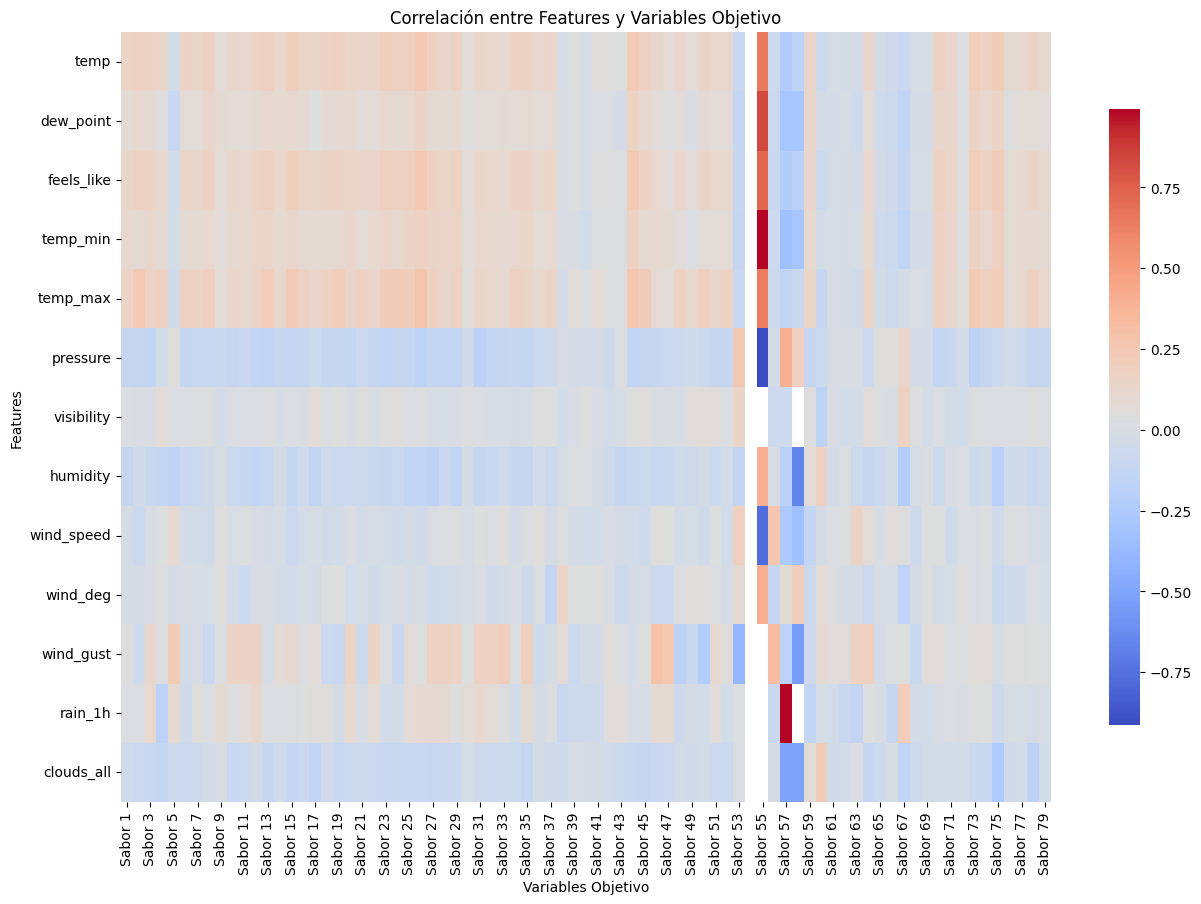

In [52]:
# Seleccionar solo columnas numéricas
df_corr = df.select_dtypes(include=[np.number])

# Features y Targets
features = [
    'temp', 'dew_point', 'feels_like', 'temp_min', 'temp_max', 'pressure',
    'visibility', 'humidity', 'wind_speed', 'wind_deg', 'wind_gust',
    'rain_1h', 'clouds_all'
]
targets = [f'Sabor {i}' for i in range(1, 80)]

# Calcular la correlación entre features y targets
correlation_matrix = df_corr[features + targets].corr()

# Filtrar solo las correlaciones entre features y targets
correlation_matrix = correlation_matrix.loc[features, targets]

# Crear el heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlación entre Features y Variables Objetivo')
plt.xlabel('Variables Objetivo')
plt.ylabel('Features')
plt.show()

In [56]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
df.to_csv(os.path.join('..', DATA_RAW, "dataframe_merged.csv"), sep = ";", index = False)